In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
# # linearizing images
# img_root = './data/frog'
# files = os.listdir(img_root)
# files.sort()
# # files = files[11:]
# files = [f for f in files if 'jpg' in f]

# images_for_lin = []
# for i, fl in enumerate(files) :
#     if i % 12 != 0 : continue
#     im = cv2.imread(img_root + '/' + fl)[::30,::30]
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     images_for_lin.append(im)
# images_for_lin = np.array(images_for_lin)
# images_for_lin_reshaped = images_for_lin.reshape(images_for_lin.shape[0],-1).swapaxes(0,1)
# t = np.ones((14,1))

# def get_g(images_stack_reshaped, images_stack, w, t, r_l=1, is_w_photon=False) : 
    
#     n = 256
#     A = np.zeros((images_stack_reshaped.shape[0]*images_stack_reshaped.shape[1]+n+1,
#                   n+images_stack_reshaped.shape[0]))
#     b = np.zeros((A.shape[0],1))
#     cur_row_A = 0
#     for i in range(images_stack_reshaped.shape[0]) : # Corresponds to pixel in image
#         for j in range(images_stack_reshaped.shape[1]) : # Corresponds to image in sequence
#     #         wt_ij = 1 # placeholder
#             if is_w_photon : 
#                 wt_ij = w(images_stack_reshaped[i,j], t[j])
#             else : 
#                 wt_ij = w(images_stack_reshaped[i,j])
# #             print(wt_ij)
#             A[cur_row_A, images_stack_reshaped[i,j]] = wt_ij
#             A[cur_row_A, n+i-1] = -wt_ij
#             b[cur_row_A, 0] = wt_ij * np.log(t[j])
#             cur_row_A = cur_row_A + 1

#     # Adding the terms corresponding to the smoothing regularization
#     for i in range(n) :
#         if is_w_photon : 
#             wt_i = 1
#         else :
#             wt_i = w(i)
#         A[cur_row_A,i-1] = r_l * wt_i
#         A[cur_row_A,i] = -2*r_l*wt_i
#         A[cur_row_A,i+1] = r_l*wt_i
#         cur_row_A += 1 

#     # Normalize the curve by setting its middle value to 0
#     A[cur_row_A,128] = 1 # Corresponds to g128 in g0-g255

#     v = np.linalg.lstsq(A, b, rcond=None)
# #     print(v)
#     v_sol = v[0]
#     g = v_sol[:n]
# #     L = v_sol[n:]
# #     L = L.reshape(images_stack.shape[1], images_stack.shape[2], images_stack.shape[3])
    
#     return g
	
# w = lambda x, zmin=0.05, zmax=0.95 : 0.01
# g = get_g(images_for_lin_reshaped, images_for_lin, w, t, 10)

In [16]:
# load frogge files

# uncomment whatever seq you want to run it on
# img_root = './data/frog'
img_root = './custom-data-dump/candle-mug/seq-1/'
# img_root = './custom-data-dump/fruits/seq-1/'
files = os.listdir(img_root)
files.sort()
files = [f for f in files if 'jpg' in f]

images = []
for fl in files : 
    im = cv2.imread(img_root + '/' + fl)[::2,::2]
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  / 255
    images.append(im)
images = np.array(images)
# images = images[:,200:-50,270:630] # mug

In [17]:
# times = np.ones((images.shape[0])).astype('float32')
# calibrate = cv2.createCalibrateDebevec()
# crf = calibrate.process(images, times)
@np.vectorize
def srgb2lin(s):
    if s <= 0.0404482362771082:
        lin = s / 12.92
    else:
        lin = pow(((s + 0.055) / 1.055), 2.4)
    return lin


def lin2srgb(lin):
    if lin > 0.0031308:
        s = 1.055 * (pow(lin, (1.0 / 2.4))) - 0.055
    else:
        s = 12.92 * lin
    return s


images_lin = srgb2lin(images)
# images_lin = images.copy()

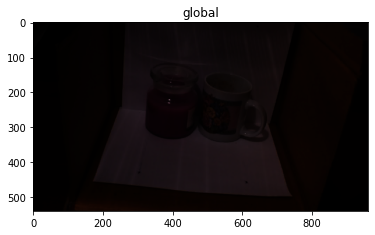

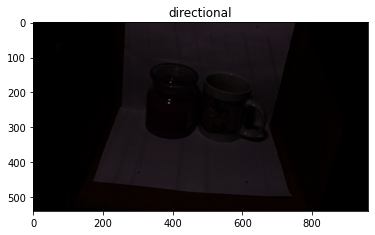

In [18]:
im_max = np.max(images_lin,0)  # dir + glo
im_min = np.min(images_lin,0)  # glo
im_glo = im_min.copy()
im_dir = im_max - im_min

plt.figure()
plt.imshow(im_glo)
plt.title('global')
plt.show()

plt.figure()
plt.imshow(im_dir)
plt.title('directional')
plt.show()

In [19]:
# im_dir[im_dir > 0.1] = 0.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


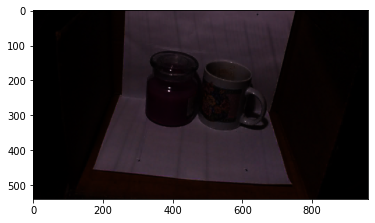

In [20]:
plt.imshow(im_dir*2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


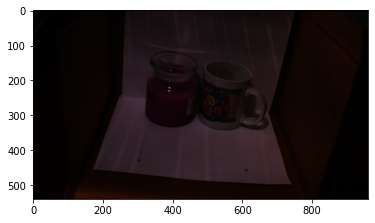

In [21]:
plt.imshow(im_glo*2)

In [ ]:
im_glo.shape